In [1]:
import numpy as np
import matplotlib.pyplot as plt

In this notebook trajectories of the box model perturbed by a stochastic term are evaluated. 

The dimensionless Stommel box model can be described by the following ODE:
$$ \dot{x} = \lambda - |1-x|x := f(x) $$


By introducing stochastiscity, the variable $x(t)$ will be transformed into a stochastic process $X(t)$, and realizations of $X(t)$ will be considerd. 

The stochastic Stommel box model can be described by the following SDE:

$$dX = f(X)dt + \sigma dW$$

where $\sigma$ is some parameter controlling the strength of the stochastic term.

To compute realizations of $X(t)$, the Euler–Maruyama (EM) method was used.  

Parameters

In [11]:
dt = 10 ** -5
t_array = np.arange(0, 50, dt)
sigma_array = [0.1, 0.15, 0.2, 0.3]
lamb = 0.2

Create functions which evaluates a realization for $X(t)$ by means of the EM method

Function f which describes the non-perturbed model

In [3]:
def f(x: float, lamb=0.5) -> float:
    y = lamb - abs(1-x)*x
    return y

EM method

In [4]:
def EM_update(X,dW, sigma):
    X_next = X + f(X,lamb)*dt + sigma*dW
    return X_next

def EM(X_0, t_array, sigma, random_seed=42):
    X = np.zeros(len(t_array))
    X[0] = X_0
    # create realization of increments of Brownian motion
    if random_seed:
        np.random.seed(42)
    dW = np.sqrt(dt) * np.random.normal(size=len(t_array))
    for n in range(1,len(X)):
        X[n] = EM_update(X[n-1], dW[n-1], sigma)
    return X


Equilibrium points of the non-perturbed ODE, calculated by solving f(x) = 0

In [5]:
x_eq_1 = 0.5*(1 + np.sqrt(1 + 4*lamb))

# two additional roots when lambda < 0.25.
if lamb < 0.25:
    x_eq_2 = 0.5*(1 + np.sqrt(1 - 4*lamb))
    x_eq_3 = 0.5*(1 - np.sqrt(1 - 4*lamb))

Starting realizations of $X(t)$ at the top equilibrium point

In [12]:
X_0 = x_eq_1

X_trajectories = {}
for sigma in sigma_array:
    X_trajectories[sigma] = EM(X_0, t_array, sigma)

Plot realizations for multiple values for $\sigma$.

In [13]:
def plot_realization(X, sigma):
    plt.plot(t_array, X, label="$x(t)$" )
    plt.axhline(x_eq_1, color='r', label="$x^{*}_{1}$")
    
    if lamb < 1/4:
        plt.axhline(x_eq_2, color='b', linestyle="--", label="$x^{*}_{2}$")
        plt.axhline(x_eq_3, color='g', label="$x^{*}_{3}$")

    plt.ylim(0,2)
    plt.xlabel('t')
    plt.ylabel('x')
    plt.legend()
    plt.title(
        f'Realization of box model ODE with stochastic forcing parameter $\\sigma$={sigma}',
        pad=20
    )
    plt.savefig(f'figures/realization_sigma_{sigma}.eps', format='eps')
    plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


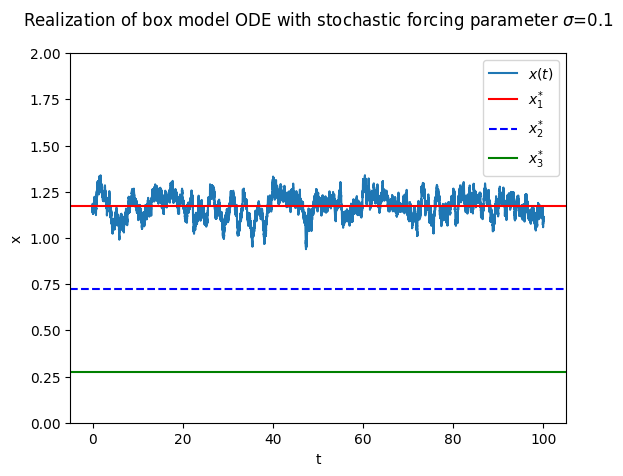

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


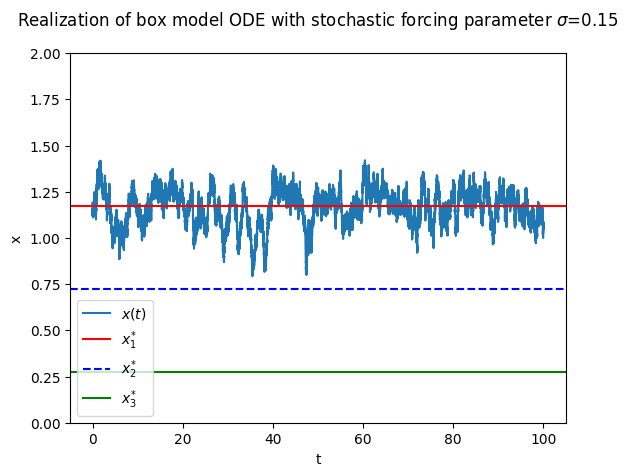

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


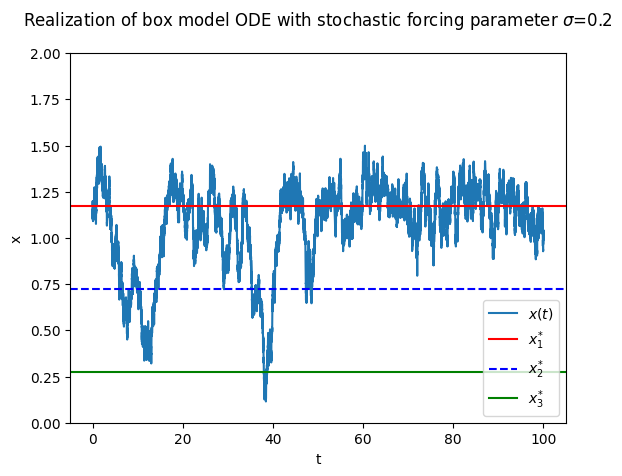

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


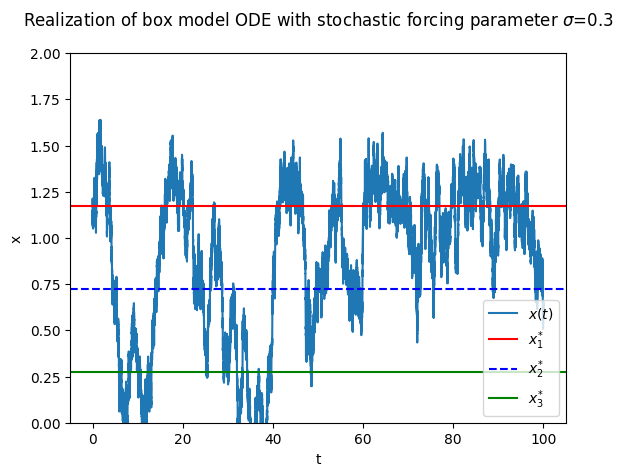

In [14]:
for sigma in sigma_array:
    X = X_trajectories[sigma]
    plot_realization(X, sigma)

Observe that for $\sigma \in \{0.1,0.15\}$, the realization of $X(t)$ keeps oscillating around the initial value $x^{*}_{1}$.

For $\sigma=0.2$ the realization moves towards the stable equilibrium $x^{*}_{3}$ and oscillates around that value, untill it returns to oscillate around the intial value.

For $\sigma=0.3$ there is similar behaviour, but now the realization jumps back and forth from $x^{*}_{1}$ to $x^{*}_{2}$ once more. 


In the subsequent section, the escape time $\mathbb{E}_{A}[\tau(x)]$ from the set $ A =[x^{*}_{2}, \infty)$ starting at $x = x^{*}_{1}$ will be estimated, for various values of $\sigma$. 

This estimation will be done by taking a sample of realizations of $X(t)$ for which the escape time will be computed, and then the sample average will be taken. It is expected that the escape time decreases as $\sigma$ increases. This is because as $\sigma$ increases, for any fixed time $t_{0}$ there is a larger proportion of realizations which escape $A$ within the domain $[0,t_{0}]$. 

In [50]:
sigma_array = np.arange(0.5, 1, 0.05) #chose this range since for smaller sigma, the realizations did not reach x_eq_2
n_realizations = 100 # sample size
mean_tau = np.zeros(len(sigma_array))

for sigma_idx, sigma in enumerate(sigma_array):
    for n in range(n_realizations):
        X = EM(X_0, t_array, sigma, random_seed=None)
        tau = np.where(X < x_eq_2)[0][0]*dt #find first time when X is smaller than x_eq_2
        mean_tau[sigma_idx] += tau/n_realizations #update sample mean


This produced the following plot

Text(0.5, 1.0, 'Estimated escape time from A starting at $x_{1}^{*}$, varying $\\sigma$')

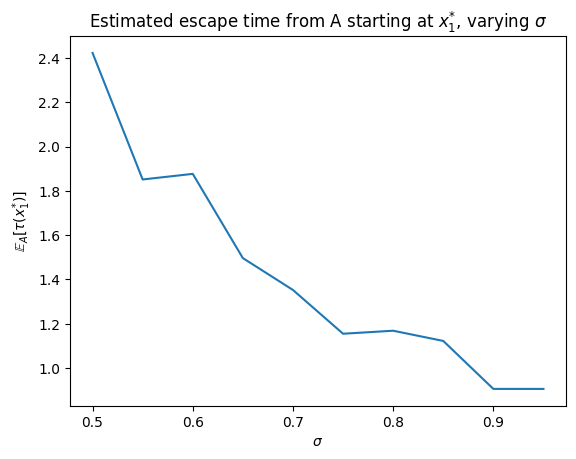

In [51]:
plt.plot(sigma_array, mean_tau)
plt.xlabel('$\\sigma$')
plt.ylabel('$\\mathbb{E}_{A}[\\tau (x_{1}^{*})]$')
plt.title('Estimated escape time from A starting at $x_{1}^{*}$, varying $\\sigma$')

where we indeed observe a decreasing estimate of the escape time as $\sigma$ increases.